In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rn
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import NGSAII as ngsa2
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
df = pd.read_csv('data/cc_fraud/creditcard.csv')
df.shape

(284807, 31)

In [3]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


##### Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [5]:
start_time = time.time()
feature_list =[1]*30
print("AUC with All features  : {} ".format(ngsa2.get_cv_score(X,y,feature_list)))
chromosome_length = df.shape[1]-1
print("Chromosome Length : {}".format(chromosome_length))
print("Time Taken : {} s".format(time.time()-start_time))

AUC with All features  : 93.75861218181481 
Chromosome Length : 30
Time Taken : 4.960954189300537 s


Generation 0 out of 15 


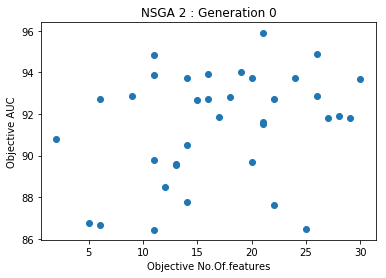

166.06080508232117 secs for Generation 0 


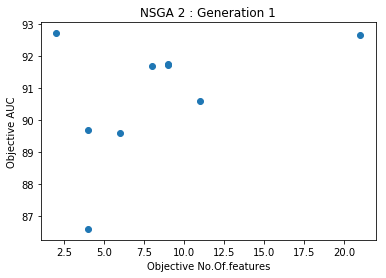

23.972554922103882 secs for Generation 1 


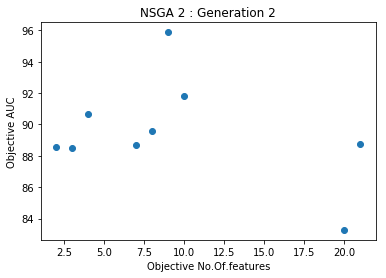

27.19665217399597 secs for Generation 2 


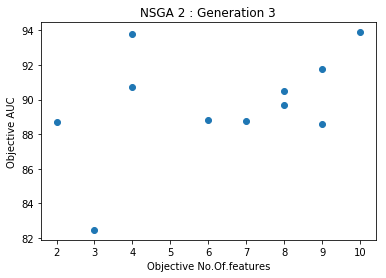

24.827271938323975 secs for Generation 3 


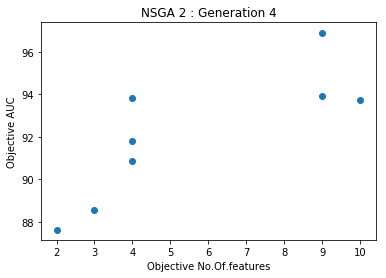

17.723348140716553 secs for Generation 4 


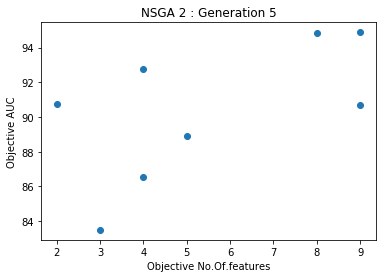

17.585429906845093 secs for Generation 5 


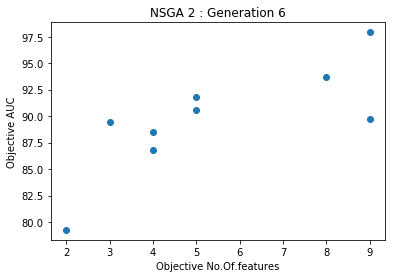

19.239302158355713 secs for Generation 6 


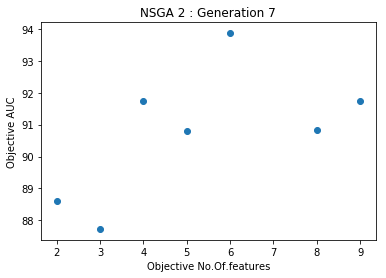

14.63936996459961 secs for Generation 7 


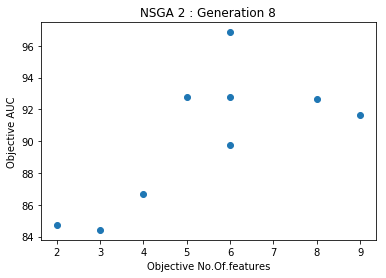

19.12158226966858 secs for Generation 8 


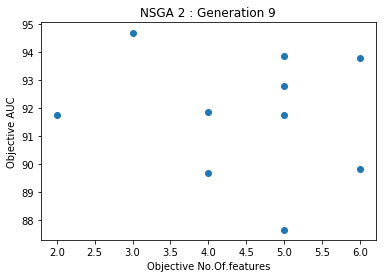

20.714513301849365 secs for Generation 9 
Generation 10 out of 15 


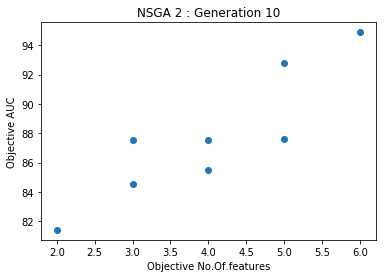

15.795512199401855 secs for Generation 10 


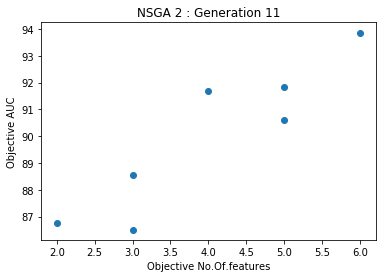

13.812606811523438 secs for Generation 11 


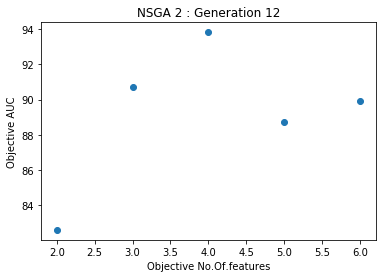

9.909579038619995 secs for Generation 12 


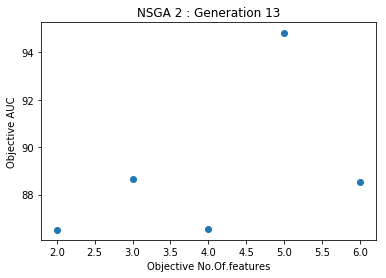

9.96454405784607 secs for Generation 13 


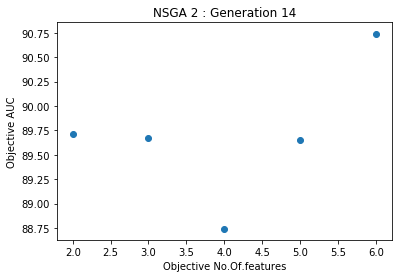

10.339197158813477 secs for Generation 14 
Selected Population : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0.]]
Scores [[ -2.          87.62367403 219.06      ]
 [ -6.          94.88193294  26.36      ]
 [ -4.          89.53431114  55.96      ]
 [ -5.          94.88036179  37.95      ]]


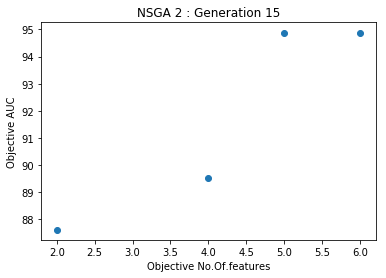

In [6]:
# Set general parameters
starting_population_size = 20
maximum_generation = 15
minimum_population_size = 5
maximum_population_size = 10

# Create starting population
population = ngsa2.create_population(starting_population_size, chromosome_length)
population = np.unique(population, axis=0)
# Now we'll go through the generations of genetic algorithm

for generation in range(maximum_generation):
    start_time = time.time()
    if generation %10 == 0:
        print ('Generation {} out of {} '.format(generation,maximum_generation))
    # Breed
    population = ngsa2.breed_population(population)
    
    # Score population
    population,scores = ngsa2.score_population(X,y,population)
    
    # Build pareto front
    population = ngsa2.build_pareto_population(
            population, scores, minimum_population_size, maximum_population_size)
    
    ngsa2.plot_2d_paretofront(scores,generation)
    time_taken = time.time()-start_time
    print("{} secs for Generation {} ".format(time_taken,generation))


# Get final pareto front
population,scores = ngsa2.score_population(X,y,population)
population_ids = np.arange(population.shape[0]).astype(int)
pareto_front = ngsa2.identify_pareto(scores, population_ids)
population = population[pareto_front, :]
scores = scores[pareto_front]

#Selected Population
print("Selected Population : \n",population)
print("Scores", scores)
ngsa2.plot_2d_paretofront(scores,generation+1)